<div style="border: 2px solid #FF69B4; background-color: #000000; color: white; padding: 20px; border-radius: 5px;">

# Figure 3

Time correlation spatial maps

---

2m-temperature, SST, Precipitation & Z500

</div>


In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

In [2]:
def create_custom_colormap(colormap_file, reverse=False):
    """
    Create a custom colormap from an NCL colormap file.

    Parameters:
    - colormap_file (str): Path to the NCL colormap file.
    - reverse (bool): If True, reverse the colormap.

    Returns:
    - custom_cmap (LinearSegmentedColormap): Custom colormap object.
    """
    # Read the RGB values from the NCL colormap file
    rgb_values = np.loadtxt(colormap_file)

    # Find the largest digit in the file
    max_digit = np.max(rgb_values)

    # Scale RGB values by the largest digit
    rgb_values_scaled = rgb_values / max_digit

    # Optionally reverse the colormap
    if reverse:
        rgb_values_scaled = rgb_values_scaled[::-1]

    # Create the colormap
    custom_cmap = LinearSegmentedColormap.from_list("CustomColormap", rgb_values_scaled)

    return custom_cmap

In [3]:
# with two transition points -- non-linear colorscale
def custom_nonlinear_cmap(vmin, vmax, lower_transition=0.0, upper_transition=0.9):
    
    # Use the in-built colormap needed; see below
    # base_cmap = plt.cm.get_cmap('gist_stern_r')
    base_cmap = plt.cm.get_cmap('terrain_r')

    # Use the custom colormap - by calling another funtion; see below
    # ncl_colormap_file = "/work/ab0995/a270229/work/misc/NCL_colortables/GMT_topo.rgb"
    # cmap1 = create_custom_colormap(ncl_colormap_file,reverse=True)

    # or give the colors; see below
    # base_cmap = ['darkred', 'red', 'lightsalmon', 'white', 'lightskyblue', 'blue', 'navy']
    
    n_bins = 256
    
    # Create non-linear spacing with more bins around the transition points
    lower = np.linspace(0, (lower_transition - vmin) / (vmax - vmin), int(n_bins * 0.1))
    middle = np.linspace((lower_transition - vmin) / (vmax - vmin), (upper_transition - vmin) / (vmax - vmin), int(n_bins * 0.3))
    upper = np.linspace((upper_transition - vmin) / (vmax - vmin), 1, int(n_bins * 0.1))
    positions = np.concatenate([lower, middle[1:], upper[1:]])
    
    # Sample colors from the Spectral colormap
    colors = base_cmap(positions)
    # colors = ['red', 'yellow', 'green', 'cyan', 'blue']
    
    # Create the colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_spectral", colors, N=n_bins)
    
    # Create the normalization
    boundaries = np.linspace(vmin, vmax, n_bins)
    norm = mcolors.BoundaryNorm(boundaries, cmap.N)
    
    return cmap, norm

In [4]:
rpath = '/work/ab0995/a270229/work/data/paper1/story-nudged/data/full_data/'
plotpath = '/work/ab0995/a270229/work/data/paper1/story-nudged/plot/ppr_REV/'

<div style="border: 2px solid #00ff40; background-color: #000000; color: white; padding: 20px; border-radius: 5px;">
 
Correlation Maps

---

2m-temperature, Precipitation, SST, Z500

- *2018-2024*
  
</div>

In [5]:
variable = ['2t', 'tprate', 'sst', 'z500']
freq = 'daily'
res = 'tco1279'

for i in range(len(variable)):
    globals()[f"ds_{variable[i]}"] = xr.open_dataset(f"{rpath}hist/processd/ppr_REV/TimCorr_{variable[i]}_{freq}_20180101-20241231_R-{res}.nc")

In [6]:
for i in range(len(variable)):
    globals()[f"da_{variable[i]}"] =  globals()[f"ds_{variable[i]}"]['correlation']

In [23]:
# sample plots by slicing 10x10 latlon grids; uncomment for trial data_list
# m1 = da_2t.isel(lon=slice(0, -1, 20), lat=slice(1, -1, 20))
# m2 = da_sst.isel(lon=slice(0, -1, 20), lat=slice(1, -1, 20))
# m3 = da_tprate.isel(lon=slice(0, -1, 20), lat=slice(1, -1, 20))
# m4 = da_z500.isel(lon=slice(0, -1, 20), lat=slice(1, -1, 20))

# # List of data arrays to plot
# data_list = [m1, m2, m3, m4]
# lat = m1.lat
# lon = m1.lon

In [7]:
# Use the custom colormap
vmin, vmax = -0.2, 1.0
lower_transition = 0.0
upper_transition = 0.6
cmap, norm = custom_nonlinear_cmap(vmin, vmax, lower_transition, upper_transition)

/tmp/ipykernel_4150194/3408131769.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = plt.cm.get_cmap('terrain_r')


In [8]:
# List of data arrays to plot; comment this if you are doing the trial data_list
data_list = [da_2t, da_sst, da_tprate, da_z500]
lat= da_2t.lat
lon =da_2t.lon

/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/a/a270229/.conda/envs/mypython/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bot

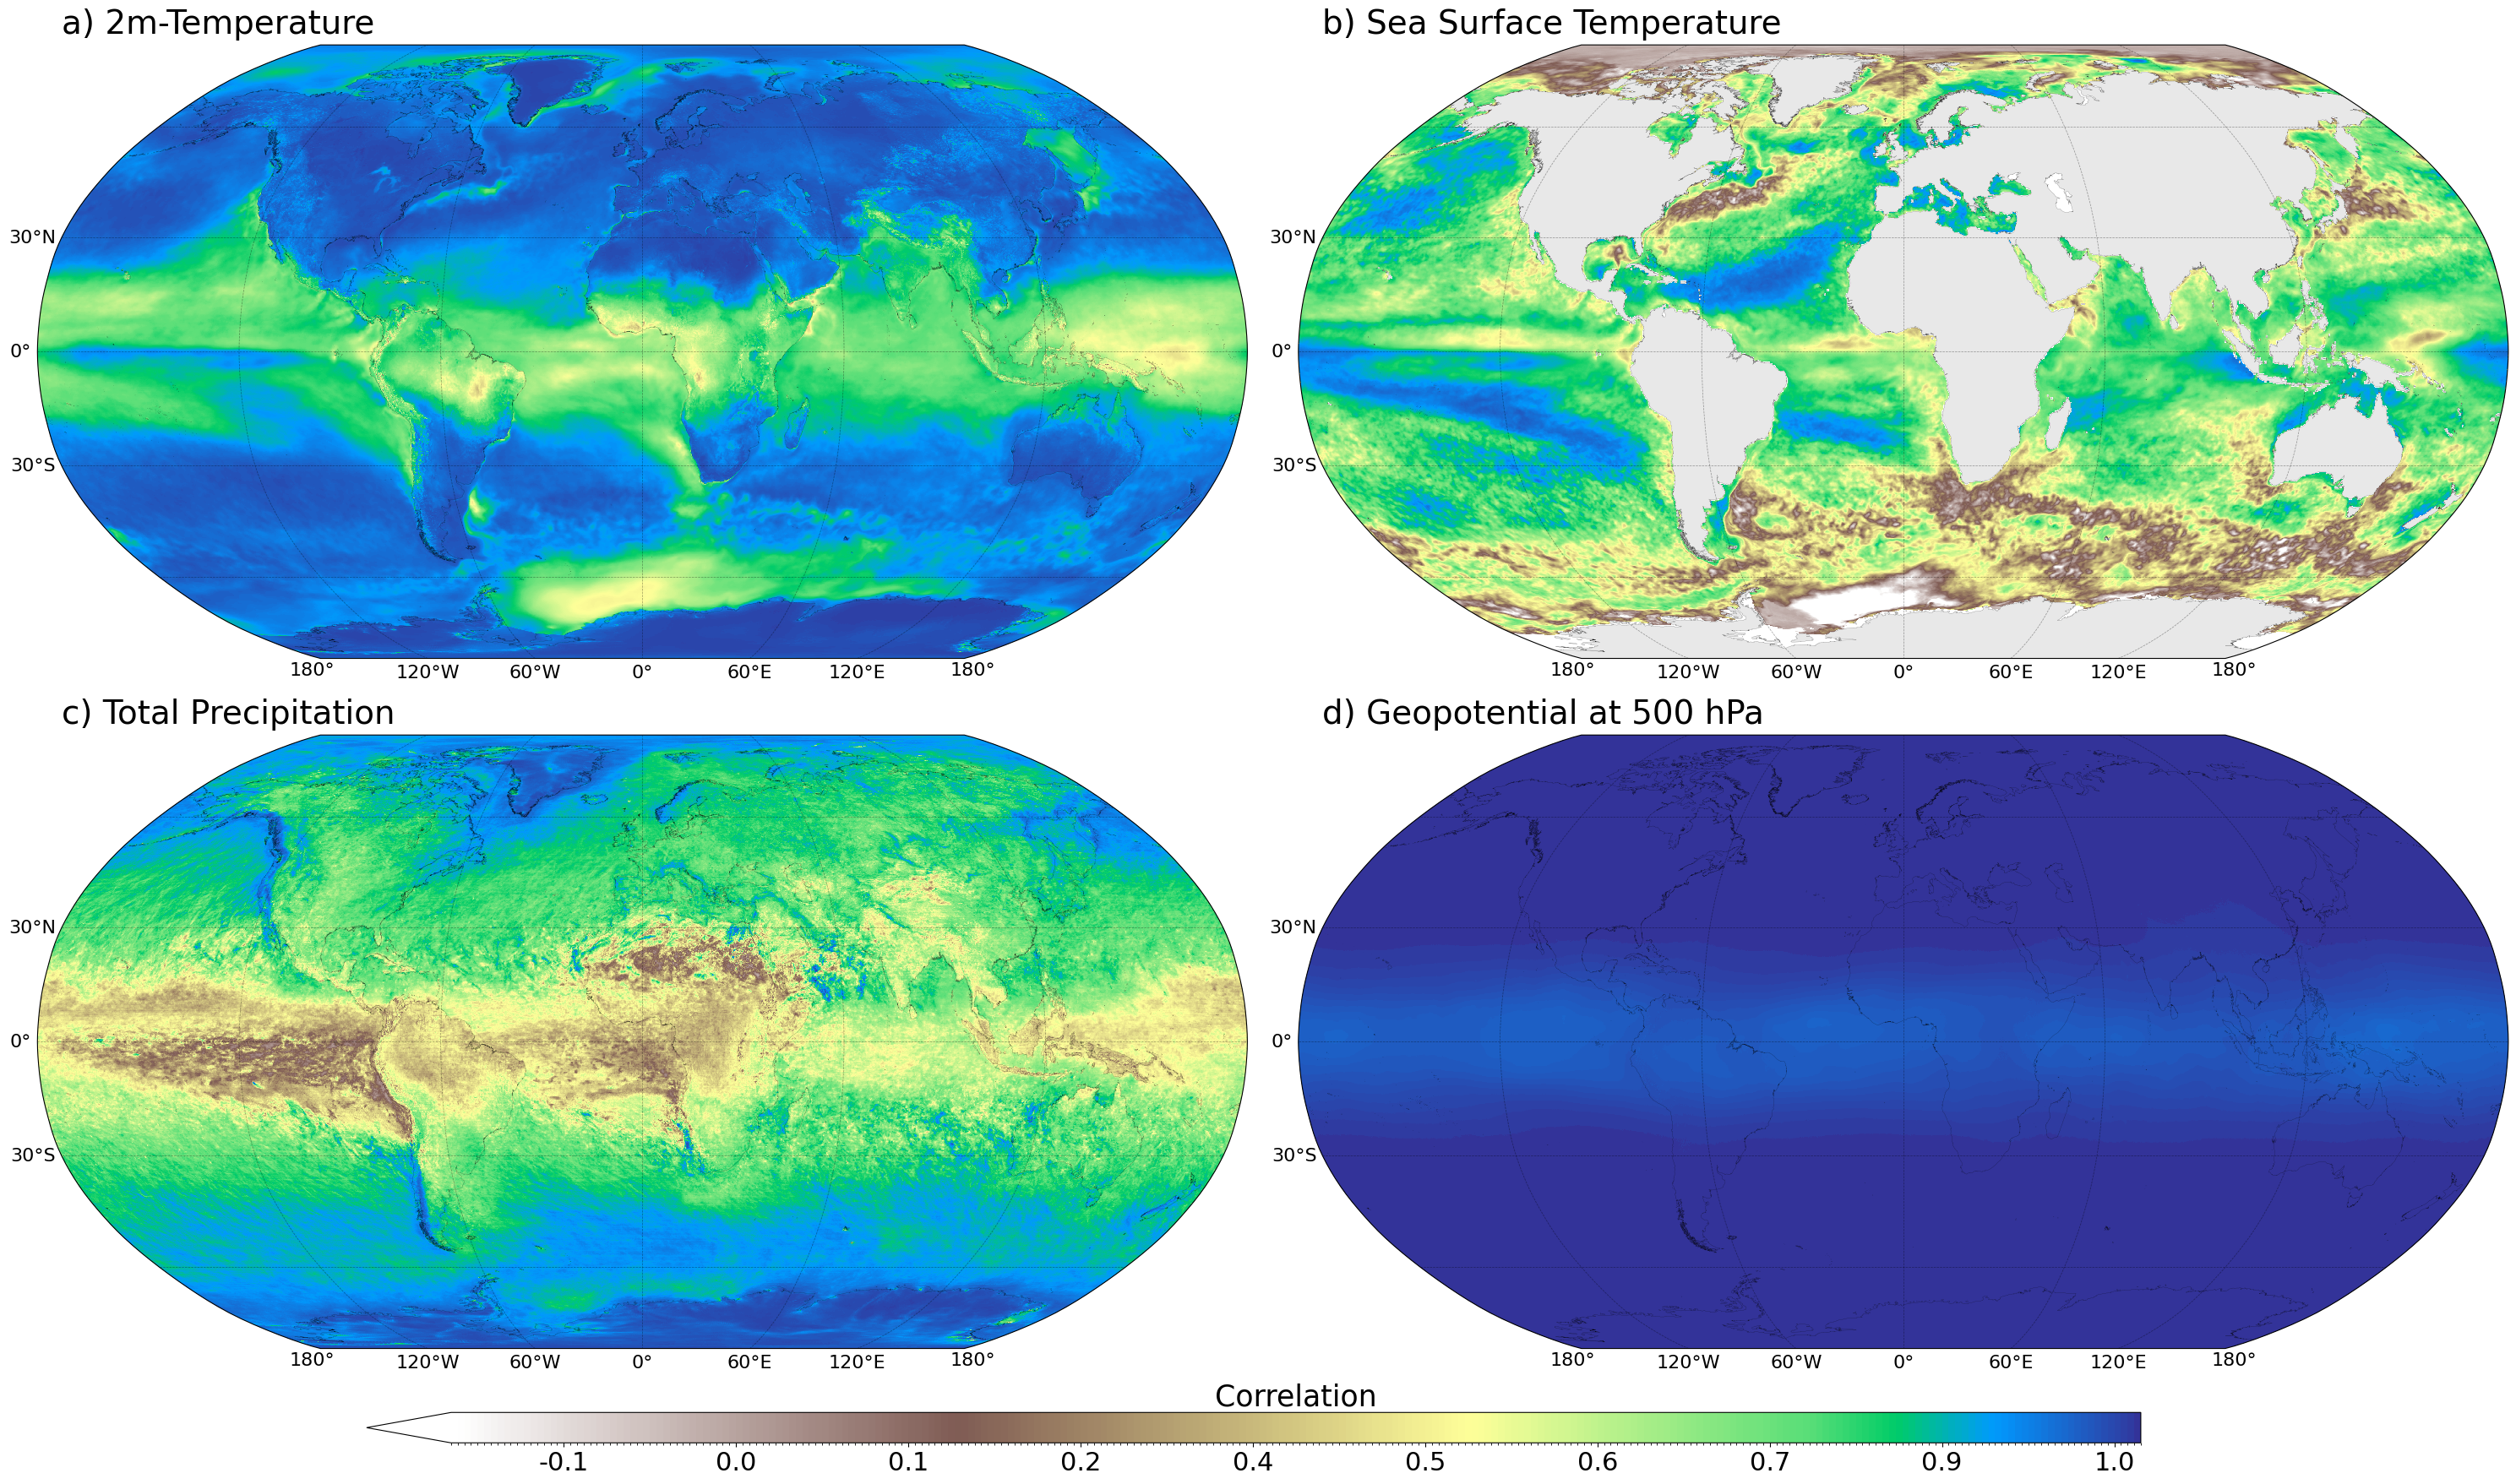

In [26]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 18), subplot_kw={'projection': ccrs.Robinson()})

titles = ['2m-Temperature', 'Sea Surface Temperature', 'Total Precipitation', 'Geopotential at 500 hPa']

# Plot each panel
for i, (ax, data, title) in enumerate(zip(axes.flat, data_list, titles)):


    missing_data = np.isnan(data)
    if np.any(missing_data):
        land = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='black', facecolor='lightgrey', linewidth=0.001, alpha=0.5)
        ax.add_feature(land)


    p = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

    ax.coastlines(resolution='10m', color='k', linewidth=0.1)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='k', alpha=0.2, linestyle='--')

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='k', alpha=0.2, linestyle='--', zorder=10)
    gl.ylabels_left = True  # Show y-axis labels on the left side
    gl.xlabels_bottom = True
    gl.ylabel_style = {'size': 16}  
    gl.xlabel_style = {'size': 16}

    ax.text(0.02, 1.06, f'{chr(97 + i)}) {title}', transform=ax.transAxes, fontsize=28, va='top', ha='left')

# # Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal', extend='min', aspect=50)
cbar.ax.tick_params(labelsize=22)
cbar.ax.set_title('Correlation', fontsize=25)
# cbar.ax.minorticks_off()
cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Adjust layout
plt.subplots_adjust(wspace=0.65, hspace=1.0)
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for colorbar

plt.savefig(f"{plotpath}F3.png", dpi=500, bbox_inches='tight')

plt.show()
